# 4부 비선형 자료구조

# 12장 그래프

> 수학에서, 좀 더 구체적으로 그래프 이론에서 그래프란 객체의 일부 쌍들이 '연관되어' 있는 객체 집합 구조를 말합니다.

### 그래프 순회

> 그래프 순회란 그래프 탐색이라고도 불리우며 그래프의 각 정점을 방문하는 과정을 말합니다.

깊이 우선 탐색 (Depth-First Search, DFS)과 너비 우선 탐색 (Breadth-First Search, BFS)의 2가지 알고리즘이 있습니다.

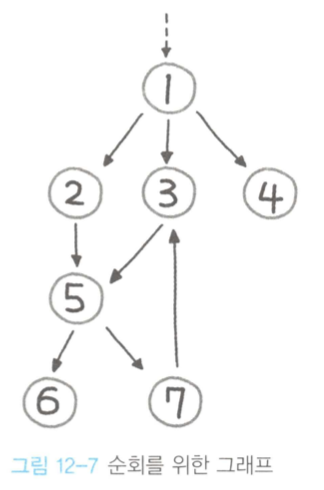

### 32. 섬의 개수

1을 육지로, 0을 물로 가정한 2D 그리드 맵이 주어졌을 때, 섬의 개수를 계산하라.

(연결되어 있는 1의 덩어리 개수를 구하라.)

예제 1
- 입력 :

11110  
11010  
11000  
00000  

- 출력 : 1
 
예제 2

- 입력 :

11000  
11000  
00100  
00011  

- 출력 : 3


### 풀이 1. DFS로 그래프 탐색

In [ ]:
def numIslands(grid):
    def dfs(i, j):
        # 더 이상 땅이 아닌 경우 종료
        if i < 0 or i >= len(grid) or \
                j < 0 or j >= len(grid[0]) or \
                grid[i][j] != '1':
            return

        grid[i][j] = 0

        # 동서남북 탐색
        dfs(i + 1, j)
        dfs(i - 1, j)
        dfs(i, j + 1)
        dfs(i, j - 1)

    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                dfs(i, j)
                # 모든 육지 탐색 후 카운트 1 증가
                count += 1
    return count
 
grid1 = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"],
]
 
print(numIslands(grid1))

1


In [ ]:
grid2 = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"],
]

print(numIslands(grid2))

3


### 중첩 함수

중첩 함수 (Nested Function)란 함수 내에 위치한 또 다른 함수로, 바깥에 위치한 함수들과 달리 부모 함수의 변수를 자유롭게 읽을 수 있다는 장점이 있습니다.

In [ ]:
def outer_function(t: str):
  text: str = t

  def inner_function():
    print(text)

    inner_function()

t = 'Hello!'
print(outer_function(t))

None


In [ ]:
# 연산자 조작

def outer_function(a):
  b = a
  print(id(b), b)

  def inner_function1():
    b.append(4)
    print(id(b), b)

  def inner_function2():
    print(id(b), b)

    inner_function1()
    inner_function2()

print(outer_function([1,2,3]))

140237796527152 [1, 2, 3]
None


### 재할당이 마음대로 되지 않는군요..ㅠ

### 전화 번호 문자 조합

2에서 9까지 숫자가 주어졌을 때 전화 번호로 조합 가능한 모든 문자를 출력하라.

- 입력 : "23"

- 출력 : ["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"]

- 설명 : 2는 abc, 3은 def가 가능하므로 각각 한 문자씩 9개의 문자로 조합 가능합니다.

### 풀이 1. 모든 조합 탐색

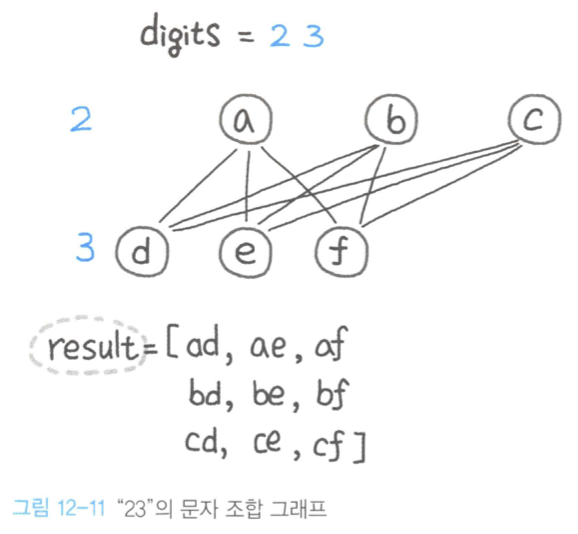

In [ ]:
def letter_combinations(digits):
  def dfs(index, path):
    # 끝까지 탐색하면 백트래킹
    if len(path) == len(digits):
      result.append(path)
      return
 
    # 입력값 자릿수 단위 반복
    for i in range(index, len(digits)):
      # 숫자에 해당하는 모든 문자열 반복
      for j in dic[digits[i]]:
        dfs(i + 1, path + j)
 
  # 예외 처리
  if not digits:
    return
  
  dic = {"2": "abc", "3": "def", "4": "ghi", "5": "jkl",
         "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"}
 
  result = []
  dfs(0, "")
 
  return result 
 
digits = "23"
print(letter_combinations(digits))

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


### 34. 순열

서로 다른 정수를 입력받아 가능한 모든 순열을 리턴하라.

- 입력 : [1, 2, 3]

- 출력 :
[
  [1,2,3],  
  [1,3,2],  
  [2,1,3],  
  [2,3,1],  
  [3,1,2],  
  [3,2,1]  
]

In [ ]:
def permute(nums):
  results = []
  prev_elements = []
 
  def dfs(elements):
    # 리프 노드일 때 결과 추가
    if len(elements) == 0:
      results.append(prev_elements[:])
 
    # 순열 생성 재귀 호출
    for e in elements:
      next_elements = elements[:]
      next_elements.remove(e)
 
      prev_elements.append(e)
      dfs(next_elements)
      prev_elements.pop()
 
  dfs(nums)
  return results
 
nums = [1,2,3]
print(permute(nums))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


### 풀이 2. itertools 모듈 사용

In [ ]:
import itertools
 
def permute(nums):
  return list(itertools.permutations(nums))
 
nums = [1,2,3]
print(permute(nums))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


### 객체 복사

In [ ]:
a = [1, 2, 3]
b = a
c = a[:]
id(a), id(b), id(c)

(140237796520336, 140237796520336, 140237796509488)

In [ ]:
d = a.copy()
id(a), id(b), id(c), id(d)

(140237796520336, 140237796520336, 140237796509488, 140237796482096)

In [ ]:
import copy

a =[1, 2, [3, 5], 4]
b = copy.deepcopy(a)
id(a), id(b), b

(140237796481936, 140237796757248, [1, 2, [3, 5], 4])

- 리스트 내에 리스트를 갖는 중첩된 리스트도 deepcopy()를 사용하면 문제 없이 값을 복샇할 수 있으며, 다른 ID를 갖는다.

### 35. 조합

전체 수 n을 입력받아 k개의 조합을 리턴하라.

- 입력 : n = 4, k = 2

- 출력 :
[  
  [2,4],  
  [3,4],  
  [2,3],  
  [1,2],  
  [1,3],  
  [1,4]  
]  

### 풀이 1. DFS로 k개 조합 생성

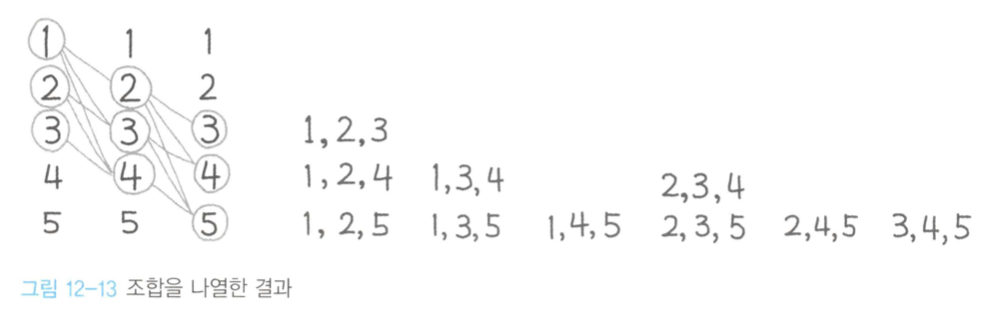

In [ ]:
def combine1(n, k):
  results = []
 
  def dfs(elements, start, k):
    if k == 0:
      results.append(elements[:])

    # 자신 이전의 모든 값을 고정하여 재귀 호출
    for i in range(start, n + 1):
      elements.append(i)
      dfs(elements, i + 1, k -1)
      elements.pop()
 
  dfs([], 1, k)
  return results
 
n = 4
k = 2
 
print(combine1(n, k))

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


### 풀이 2. itertools 모듈 사용

In [ ]:
def combine2(n, k):
  return list(itertools.combinations(range(1, n+1), k))

n = 4
k = 2

print(combine2(n, k))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


### 36. 조합의 합

숫자 집합 candidates를 조합하면 합이 target이 되는 원소를 나열하라. 각 원소는 중복으로 나열 가능하다.

예제1

- 입력 :

candidates = [2,3,6,7], target = 7

- 출력 :

[  
  [7],  
  [2,2,3]  
]

예제 2

- 입력 :

candidates = [2,3,5], target = 8

- 출력 :

[  
  [2,2,2,2],  
  [2,3,3],  
  [3,5]  
]

### 풀이 1. DFS로 중복 조합 그래프 탐색

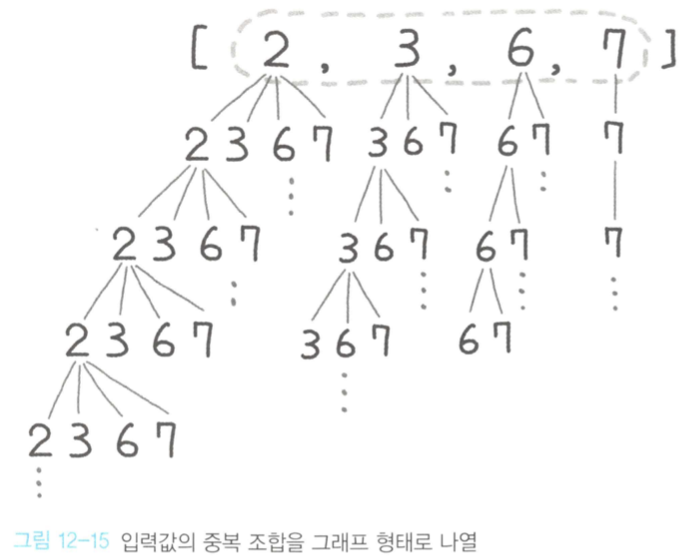

In [ ]:
def combination_sum(candidates, target):
  result = []
 
  def dfs(csum, index, path):
    # 종료 조건
    if csum < 0:
      return
    if csum == 0:
      result.append(path)
      return
 
    # 자신부터 하위 원소까지의 나열 재귀 호출
    for i in range(index, len(candidates)):
      dfs(csum - candidates[i], i, path + [candidates[i]])
 
  dfs(target, 0, [])
  return result
 
candidates1 = [2,3,6,7]
target1 = 7
 
print(combination_sum(candidates1, target1))

[[2, 2, 3], [7]]


In [ ]:
candidates2 = [2,3,5]
target2 = 8

print(combination_sum(candidates2, target2))

[[2, 2, 2, 2], [2, 3, 3], [3, 5]]


### 37. 부분 집합

모든 부분 집합을 리턴하라.

- 입력 :
nums = [1, 2, 3]

- 출력 :
[  
  [3],  
  [1],  
  [2],  
  [1,2,3],  
  [1,3],  
  [2,3],  
  [1,2],  
  []  
]

### 풀이 1. 트리의 모든 DFS 결과

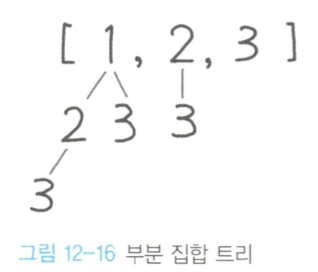

In [ ]:
def subsets(nums):
  result = []

  def dfs(index, path):
    # 매번 결과 추가
    result.append(path)

    # 경로를 만들면서 DFS
    for i in range(index, len(nums)):
      dfs(i + 1, path + [nums[i]])
 
  dfs(0, [])
  return result
  
nums = [1,2,3]
print(subsets(nums))

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]


### 338. 일정 재구성

[from, to]로 구성된 항공권 목록을 이용해 JFK에서 출발하는 여행 일정을 구성하라. 여러 일정이 있는 경우 사전 어휘 순으로 방문한다.

예제 1

- 입력: 

[["MUC, "LHR"], ["JFK", "MUC"], ["SFO", "SJC"], ["LHR", "SFO"]]

- 출력:

["JFK", "MUC", "LHR", "SFO", "SJC"]
 

예제 2

- 입력:

[["JFK", "SFO"], ["JFK", "ATL"], ["SFO", "ATL"], ["ATL", "JFK"], ["ATL", "SFO"]]

- 출력:

["JFK", "ATL", "JFK", "SFO", "ATL", "SFO"]

- 설명 :
["JFK", "SFO", "ATL", "JFK", "ATL", "SFO"] 도 가능하지만 사전의 어휘 등장 순서에 맞지 않기 때문에 정답이 아니다.

### 풀이 1. DFS로 일정 그래프 구성

In [ ]:
import collections
 
def find_itinerary(tickets):
  graph = collections.defaultdict(list)
 
  # 그래프 순서대로 구성
  for a, b in sorted(tickets):
    graph[a].append(b)
 
  route = []
 
  def dfs(a):
    # 첫 번째 값을 읽어 어휘 순 방문
    while graph[a]:
      dfs(graph[a].pop(0))
    route.append(a)
 
  dfs('JFK')
  # 다시 뒤집어 어휘 순 결과로
  return route[::-1]
 
tickets = [["MUC", "LHR"], ["JFK", "MUC"], ["SFO", "SJC"], ["LHR", "SFO"]]
print(find_itinerary(tickets))

['JFK', 'MUC', 'LHR', 'SFO', 'SJC']


### 풀이 2. 스택 연산으로 큐 연산 최적화 시도

In [ ]:
def find_itinerary(tickets):
  graph = collections.defaultdict(list)

  # 그래프를 뒤집어서 구성
  for a, b in sorted(tickets, reverse=True):
    graph[a].append(b)
 
  route = []
 
  def dfs(a):
    # 마지막 값을 읽어 어휘 순 방문
    while graph[a]:
      dfs(graph[a].pop())
    route.append(a)
 
  dfs('JFK')
  # 다시 뒤집어 어휘 순 결과로
  return route[::-1]
 
tickets = [["MUC", "LHR"], ["JFK", "MUC"], ["SFO", "SJC"], ["LHR", "SFO"]]
print(find_itinerary(tickets))

['JFK', 'MUC', 'LHR', 'SFO', 'SJC']


### 풀이 3. 일정 그래프 반복

In [ ]:
def find_itinerary(tickets):
  graph = collections.defaultdict(list)
 
  # 그래프 순서대로 구성
  for a, b in sorted(tickets):
    graph[a].append(b)
 
  route, stack = [], ['JFK']
  while stack:
    # 반복으로 스택을 구성하되 막히는 부분에서 풀어내는 처리
    while graph[stack[-1]]:
      stack.append(graph[stack[-1]].pop(0))
    route.append(stack.pop())
 
  # 다시 뒤집어 어휘 순 결과로
  return route[::-1]
 
tickets = [["MUC", "LHR"], ["JFK", "MUC"], ["SFO", "SJC"], ["LHR", "SFO"]]
print(find_itinerary(tickets))

['JFK', 'MUC', 'LHR', 'SFO', 'SJC']


### 39. 코스 스케줄

0을 완료하기 위해서는 1을 끝내야 한다는 것을 [0,1] 쌍으로 표현하는 n개의 코스가 있다. 코스 개수 n과 이 쌍들을 입력으로 받았을 때 모든 코스가 완료 가능한지 판별하라.

예제 1

- 입력 : 
2, [[1,0]]

- 출력 :
true

- 설명 :
2개의 코스가 있으며, 1을 완료하기 위해 0을 끝내면 된다. 따라서 가능하다. 

예제 2

- 입력 :

2, [[1,0],[0,1]]

- 출력 :
false

- 설명 :
2개의 코스가 있으며, 1을 완료하기 위해서는 0을 끝내야 하고, 0을 완료하기 위해서는 1을 끝내야한다. 따라서 불가능하다.

### 풀이 1. DFS로 순환 구조 판별

In [ ]:
def can_finish(num_courses, prerequisites):
  graph = collections.defaultdict(list)
 
  # 그래프 구성
  for x, y in prerequisites:
    graph[x].append(y)
 
  traced = set()
 
  def dfs(i):
    # 순환 구조이면 False
    if i in traced:
      return False
 
    traced.add(i)
    for y in graph[i]:
      if not dfs(y):
        return False
    # 탐색 종료 후 순환 노드 삭제
    traced.remove(i)
 
    return True
 
  # 순환 구조 판별
  for x in list(graph):
    if not dfs(x):
      return False
 
  return True
 
num_courses = 2
prerequisites = [[1,0]]
print(can_finish(num_courses, prerequisites))

True


### 풀이 2. 가지치기를 이용한 최적화

In [ ]:
def can_finish(num_courses, prerequisites):
  graph = collections.defaultdict(list)
 
  # 그래프 구성
  for x, y in prerequisites:
    graph[x].append(y)
 
  traced = set()
  visited = set()
 
  def dfs(i):
    # 순환 구조이면 False
    if i in traced:
      return False
    # 이미 방문했던 노드이면 True
    if i in visited:
      return True
 
    traced.add(i)
    for y in graph[i]:
      if not dfs(y):
        return False

    # 탐색 종료 후 순환 노드 삭제
    traced.remove(i)
    # 탐색 종료 후 방문 노드 추가
    visited.add(i)
 
    return True
 
  # 순환 구조 판별
  for x in list(graph):
    if not dfs(x):
      return False
 
  return True
 
num_courses = 2
prerequisites = [[1,0]]
print(can_finish(num_courses, prerequisites))

True
